Data Generation

In [1]:
# Importing the 'random' module, which provides functions to generate random numbers, shuffle data, and make random selections.
import random

# Importing the 'Faker' class from the 'faker' library, which allows the generation of fake data such as names, addresses, emails, and more.
from faker import Faker

# Initialize Faker instance
fake = Faker()

# Predefined data
data = {
    'payment_types': ['Card', 'Internet Banking', 'UPI', 'Wallet'],
    'countries': ['USA', 'UK', 'Germany', 'India', 'Canada'],
    'categories': ['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Sports'],
    'sites': ['Amazon', 'eBay', 'Flipkart', 'Walmart', 'Shopify'],
    'payment_status': ['Y', 'N'],
    'failure_reasons': ['Insufficient funds', 'Payment gateway error', 'Card expired', None],
    'product_name': [
        "Milk", "Bread", "Coffee", "Eggs", "Juice", "Toothpaste", "Shampoo", "Soap", "Deodorant", 
        "Lotion", "Detergent", "Trash Bags", "Paper Towels", "Cleaning Spray", "Light Bulbs", 
        "Smartphones", "Laptops", "Headphones", "Chargers", "Batteries", "Gasoline",
        "Car Maintenance Products (e.g., motor oil)", "Public Transport Cards", "Pens", "Notebooks",
        "Printer Paper", "Sticky Notes", "Stapler", "Hand Sanitizer", "Tissues", "Aluminum Foil",
        # Additional product names here...
    ]
}

# Function to generate a single record
def generate_record():
    payment_success = random.choice(data['payment_status'])
    return {
        'Order Id': fake.uuid4(),
        'Customer Id': fake.uuid4(),
        'Customer Name': fake.name(),
        'Product Id': fake.uuid4(),
        'Product Name': random.choice(data['product_name']),
        'Product Category': random.choice(data['categories']),
        'Payment Type': random.choice(data['payment_types']),
        'Quantity ordered': random.randint(1, 5),
        'Price': round(random.uniform(10, 1000), 2),
        'Date and time when order was placed': fake.date_time_this_decade(),
        'Customer Country': random.choice(data['countries']),
        'Customer City': fake.city(),
        'Site from where order was placed': random.choice(data['sites']),
        'Payment Transaction Confirmation Id': fake.uuid4(),
        'Payment Success or Failure': payment_success,
        'Reason for payment failure': random.choice(data['failure_reasons']) if payment_success == 'N' else None
    } 

In [2]:
# Importing the 'csv' module, which provides functionality to read from and write to CSV (Comma-Separated Values) files in Python.
import csv

# Generate and save 10,000 records to a CSV file
def save_records_to_csv(filename, num_records=10000):
    # Generate one sample record to get the fieldnames
    sample_record = generate_record()

    # Write records to CSV
    with open(filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=sample_record.keys())
        writer.writeheader()

        # Generate and write all records
        writer.writerows(generate_record() for _ in range(num_records))

# Call the function to save 10,000 records
save_records_to_csv('transaction_data.csv')

In [3]:
# Importing the 'pandas' library with alias name pd
import pandas as pd


# Load CSV directly into a DataFrame and preview the first few rows
df = pd.read_csv('transaction_data.csv', usecols=None)

# Display the first few rows of the DataFrame
print(df.head())


                               Order Id                           Customer Id  \
0  9893ef2a-a3e8-49a9-865b-a6a5e65d529d  cd8fbd77-60ac-4a57-8809-7007cfaaf03a   
1  9fe07613-8679-4975-acfd-a7b9426b3611  f01fe095-cabb-4472-8d81-9e63a6867a86   
2  f5dfe05f-3116-4733-b85c-9de04e6d69f2  ee9215d2-abad-4b75-8072-c1fd02ae2616   
3  edc2adc0-bd94-4d69-8247-a4ee2533d184  49e33d15-33ba-4167-bb7b-d4c61c9e0f65   
4  a2f9cfe3-470f-4dc8-b46b-6f5204101378  7b91edf1-b005-48c4-9078-4a8abe5fd059   

       Customer Name                            Product Id  \
0        Tina Thomas  e87b9479-5cf2-4d03-b938-85cf8fc03e4c   
1       Dawn Bridges  af51211c-79c4-459e-95be-a356d520e0dc   
2  Alexander Johnson  1bb30b02-31c3-4b42-8edc-905a8afa8f3a   
3   Kathleen Mcguire  1ddd61d3-5601-405a-bf54-4014a1f86c51   
4      Cindy Leonard  95b292d4-91cc-46fd-87ec-deefea61dddc   

                                 Product Name Product Category  \
0                                      Lotion      Electronics   
1       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order Id                             10000 non-null  object 
 1   Customer Id                          10000 non-null  object 
 2   Customer Name                        10000 non-null  object 
 3   Product Id                           10000 non-null  object 
 4   Product Name                         10000 non-null  object 
 5   Product Category                     10000 non-null  object 
 6   Payment Type                         10000 non-null  object 
 7   Quantity ordered                     10000 non-null  int64  
 8   Price                                10000 non-null  float64
 9   Date and time when order was placed  10000 non-null  object 
 10  Customer Country                     10000 non-null  object 
 11  Customer City                

Data Validation

In [5]:
# method in pandas that returns the number of non-null values for each column in the DataFrame 'df'
df.head().count

<bound method DataFrame.count of                                Order Id                           Customer Id  \
0  9893ef2a-a3e8-49a9-865b-a6a5e65d529d  cd8fbd77-60ac-4a57-8809-7007cfaaf03a   
1  9fe07613-8679-4975-acfd-a7b9426b3611  f01fe095-cabb-4472-8d81-9e63a6867a86   
2  f5dfe05f-3116-4733-b85c-9de04e6d69f2  ee9215d2-abad-4b75-8072-c1fd02ae2616   
3  edc2adc0-bd94-4d69-8247-a4ee2533d184  49e33d15-33ba-4167-bb7b-d4c61c9e0f65   
4  a2f9cfe3-470f-4dc8-b46b-6f5204101378  7b91edf1-b005-48c4-9078-4a8abe5fd059   

       Customer Name                            Product Id  \
0        Tina Thomas  e87b9479-5cf2-4d03-b938-85cf8fc03e4c   
1       Dawn Bridges  af51211c-79c4-459e-95be-a356d520e0dc   
2  Alexander Johnson  1bb30b02-31c3-4b42-8edc-905a8afa8f3a   
3   Kathleen Mcguire  1ddd61d3-5601-405a-bf54-4014a1f86c51   
4      Cindy Leonard  95b292d4-91cc-46fd-87ec-deefea61dddc   

                                 Product Name Product Category  \
0                                      Lo

In [6]:
# Check for missing values and display them
missing_values = df.isna().sum() 
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Reason for payment failure    6222
dtype: int64


In [7]:
# Replace missing values in 'Reason for payment failure' with 'No Failure'
df['Reason for payment failure'] = df['Reason for payment failure'].fillna('No Failure')

# Check for missing values again to confirm
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [8]:
# Check for duplicates and print the count
print(f"Number of duplicate records: {df.duplicated().sum()}")

Number of duplicate records: 0


Data analysis

1. What is the top selling category of items? Per Country?

In [9]:
# Ensure the 'Price' column is numeric (in case of any formatting issues)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Group by 'Customer Country' and 'Product Category', and sum the 'Price'
country_category_sales = df.groupby(['Customer Country', 'Product Category'])['Price'].sum()
print(country_category_sales)


Customer Country  Product Category
Canada            Books               193658.01
                  Clothing            204536.81
                  Electronics         198732.44
                  Home & Kitchen      201433.42
                  Sports              205027.15
Germany           Books               193272.42
                  Clothing            193901.81
                  Electronics         189623.53
                  Home & Kitchen      194112.39
                  Sports              217289.32
India             Books               215660.73
                  Clothing            207575.69
                  Electronics         185880.15
                  Home & Kitchen      208786.42
                  Sports              208300.58
UK                Books               208087.69
                  Clothing            198906.52
                  Electronics         200173.47
                  Home & Kitchen      179402.83
                  Sports              197902.68
USA  

In [10]:

# Find the top-selling category per country
top_categories = country_category_sales.groupby(level=0).idxmax().reset_index(name='Product Category')

# Retrieve the sales amount for the top-selling category
top_categories['Total Sales'] = country_category_sales.loc[top_categories['Product Category']].values

# Display the results
print(top_categories)


  Customer Country       Product Category  Total Sales
0           Canada       (Canada, Sports)    205027.15
1          Germany      (Germany, Sports)    217289.32
2            India         (India, Books)    215660.73
3               UK            (UK, Books)    208087.69
4              USA  (USA, Home & Kitchen)    206856.74


2. How does the popularity of products change throughout the year? Per Country?

In [12]:
# Convert 'Date' column to datetime
df['Date and time when order was placed'] = pd.to_datetime(df['Date and time when order was placed'], errors='coerce')

# Extract month and year from the date
df['Month'] = df['Date and time when order was placed'].dt.month
df['Year'] = df['Date and time when order was placed'].dt.year

df.columns

Index(['Order Id', 'Customer Id', 'Customer Name', 'Product Id',
       'Product Name', 'Product Category', 'Payment Type', 'Quantity ordered',
       'Price', 'Date and time when order was placed', 'Customer Country',
       'Customer City', 'Site from where order was placed',
       'Payment Transaction Confirmation Id', 'Payment Success or Failure',
       'Reason for payment failure', 'Month', 'Year'],
      dtype='object')

In [13]:
# Group by 'Year', 'Month', 'Customer Country', and 'Product Category', and sum the 'Price'
monthly_sales = df.groupby(['Year', 'Month', 'Customer Country', 'Product Category'])['Price'].sum().reset_index()

monthly_sales


Year  Month Customer Country Product Category    Price
0     2020      1           Canada            Books  4536.91
1     2020      1           Canada         Clothing  2959.54
2     2020      1           Canada      Electronics  3151.07
3     2020      1           Canada   Home & Kitchen  4075.11
4     2020      1           Canada           Sports  1858.66
...    ...    ...              ...              ...      ...
1412  2024      9               UK      Electronics  1455.61
1413  2024      9               UK           Sports  1323.49
1414  2024      9              USA            Books  1630.45
1415  2024      9              USA      Electronics   560.29
1416  2024      9              USA           Sports   106.42

[1417 rows x 5 columns]

In [14]:
# Display the top rows of 'monthly_sales' sorted by 'Price' in descending order
top_monthly_sales = monthly_sales.sort_values(by='Price', ascending=False).head()
display(top_monthly_sales)

Year  Month Customer Country Product Category     Price
464  2021      7               UK            Books  10881.83
402  2021      5           Canada   Home & Kitchen  10538.38
89   2020      4            India           Sports   9924.12
509  2021      9            India            Books   9581.03
650  2022      3           Canada         Clothing   8374.80

3. Which locations see the highest traffic of sales?

In [15]:
import pandas as pd

# Group by 'Customer Country', sum 'Price', and sort the results
country_sales_top = (df.groupby('Customer Country')['Price']
                     .sum()
                     .reset_index(name='Total Sales')
                     .sort_values(by='Total Sales', ascending=False)
                     .head(10))

print(country_sales_top)


  Customer Country  Total Sales
2            India   1026203.57
0           Canada   1003387.83
4              USA    998387.68
1          Germany    988199.47
3               UK    984473.19


4. What times have the highest traffic of sales? Per Country?

In [16]:
# Extract the hour from the 'Date and time when order was placed'
df['Hour'] = df['Date and time when order was placed'].dt.hour

# Calculate total sales per country and hour
hourly_sales = df.groupby(['Customer Country', 'Hour'])['Price'].sum().reset_index(name='Total Sales')

# Display the top rows of the resulting DataFrame
hourly_sales.head()


Customer Country  Hour  Total Sales
0           Canada     0     41482.63
1           Canada     1     46272.03
2           Canada     2     44269.72
3           Canada     3     36205.50
4           Canada     4     44067.74

In [17]:
# Sort by 'Customer Country' and 'Total Sales' in descending order
hourly_sales_sorted = hourly_sales.sort_values(by=['Customer Country', 'Total Sales'], ascending=[True, False])

# Display the sorted DataFrame
hourly_sales_sorted.head()


Customer Country  Hour  Total Sales
7            Canada     7     48778.14
15           Canada    15     46714.06
6            Canada     6     46625.30
1            Canada     1     46272.03
12           Canada    12     45078.29

Data Visualization

Top Selling Product category per Country using Bar plot

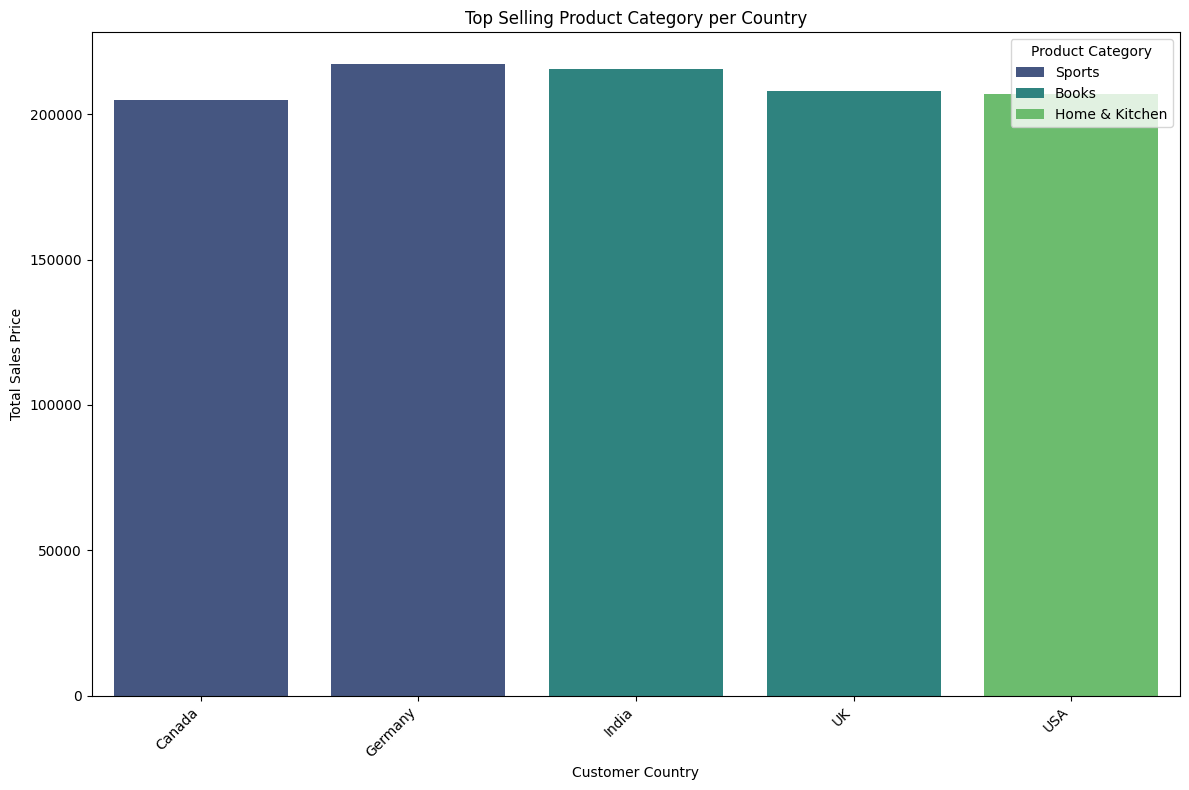

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Customer Country' and 'Product Category', and sum the 'Price'
country_category_sales = df.groupby(['Customer Country', 'Product Category'])['Price'].sum().reset_index()

# Find the top-selling category per country
top_categories = country_category_sales.loc[country_category_sales.groupby('Customer Country')['Price'].idxmax()]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=top_categories, x='Customer Country', y='Price', hue='Product Category', palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Top Selling Product Category per Country')
plt.xlabel('Customer Country')
plt.ylabel('Total Sales Price')
plt.legend(title='Product Category')

# Show the plot
plt.tight_layout()
plt.show()


Monthly Product Sales trends per Country using Line graph

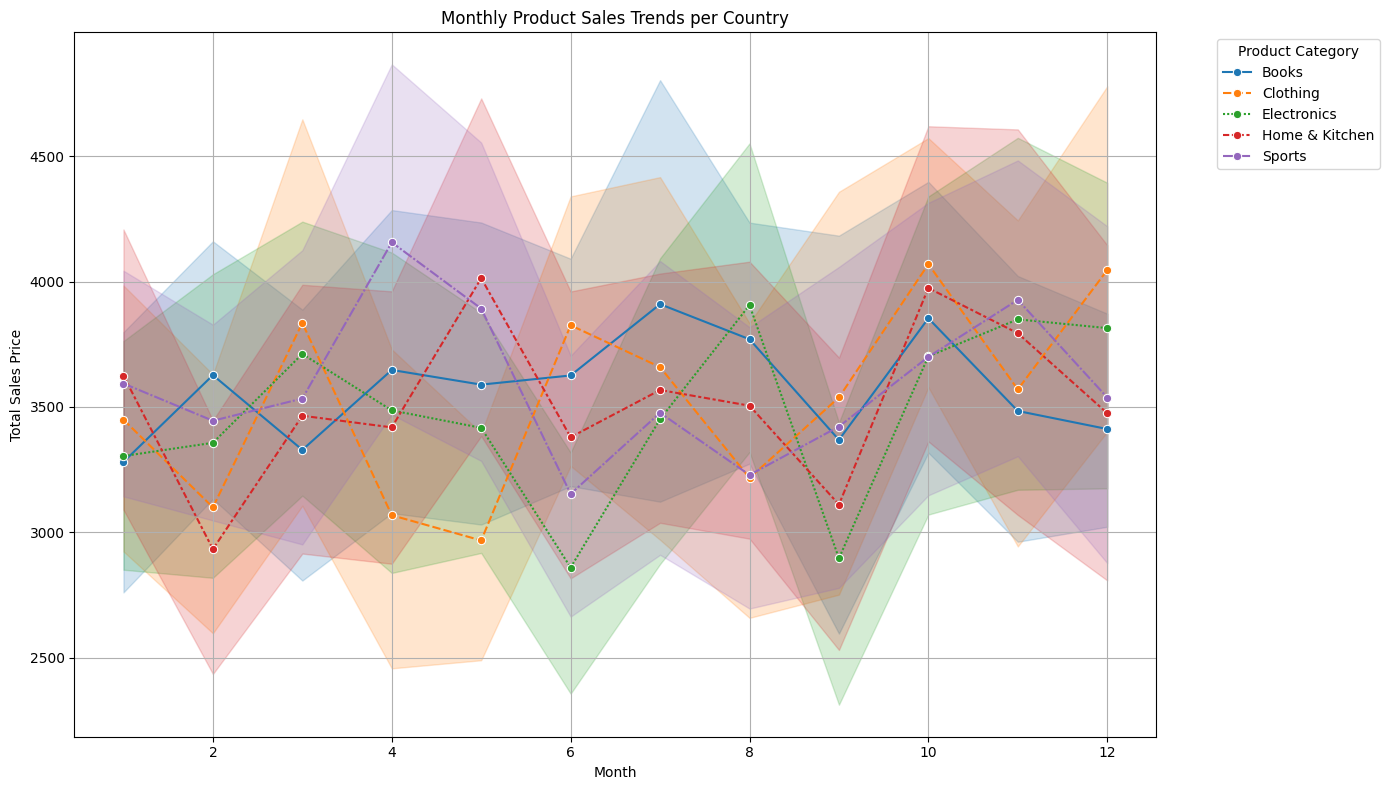

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot of product sales trends throughout the year per country
plt.figure(figsize=(14, 8))

# Optional: If you want to plot trends for each country separately
sns.lineplot(data=monthly_sales, x='Month', y='Price', hue='Product Category', style='Product Category', marker='o')

plt.title('Monthly Product Sales Trends per Country')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

Sales Distribution by Location using Pie Chart

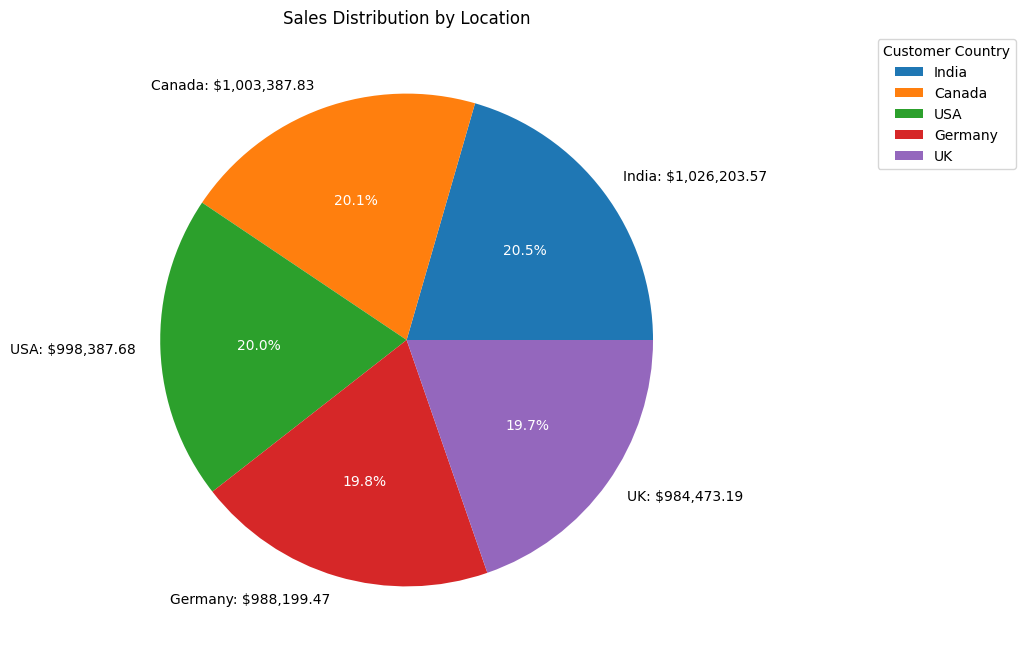

In [20]:
import matplotlib.pyplot as plt

# Define a list of five different colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Ensure the number of colors matches the number of segments
num_segments = len(country_sales_top)
colors = (colors * (num_segments // len(colors) + 1))[:num_segments]

# Prepare labels with both percentage and total sales
labels = [f'{country}: ${sales:,.2f}' for country, sales in zip(country_sales_top['Customer Country'], country_sales_top['Total Sales'])]

# Create a pie chart of total sales by location
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(country_sales_top['Total Sales'], labels=labels, autopct='%1.1f%%', colors=colors)

# Add a legend
plt.legend(wedges, [label.split(':')[0] for label in labels], title="Customer Country", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Improve the appearance of the labels and percentages
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(10)

plt.title('Sales Distribution by Location')
plt.show()


Sales Traffic by Hour per Country using Heatmap

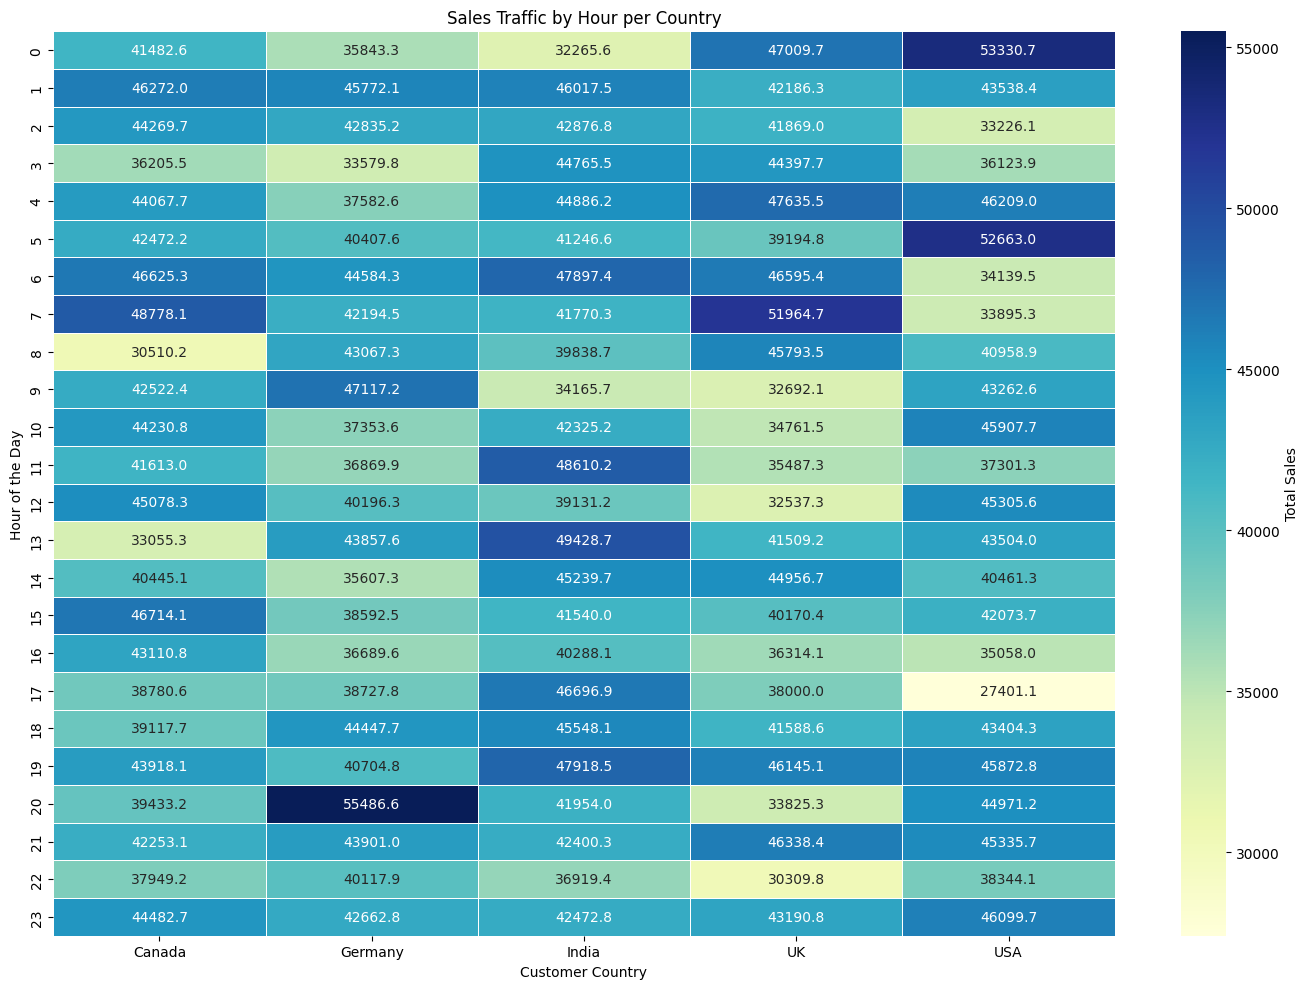

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data for the heatmap
heatmap_data = hourly_sales.pivot(index='Hour', columns='Customer Country', values='Total Sales')

# Create a heatmap of sales traffic by hour per country
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    annot=True, 
    fmt='.1f', 
    linewidths=.5,
    cbar_kws={'label': 'Total Sales'}
)
plt.title('Sales Traffic by Hour per Country')
plt.xlabel('Customer Country')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()
